In [1]:
import os, sys
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import datetime
import matplotlib.dates as mdates
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison_3 import load_variable_cube,color,variable_names,directory,filename

OrderedDict([('WRF_OXF', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'OLR'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LHRTOT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'), ('NRAIN', 'QNRAIN'), ('NICE', 'QNICE'), ('NSNOW', 'QNSNOW'), ('NGRA', 'QNGRAUPEL'), ('NAERO', 'NAER1'), ('QCOND', 'PCC'), ('QDEP', ''), ('QCNUC', ''), ('QINUC', 'MNUCCD'), ('liquid_hydrometeors', ['QCLOUD', 'QRAIN']), ('ice_hydrometeors', ['QICE', 'QSNOW', 'QGRAUP']), ('hydrometeors', ['QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP'])])), ('WRF_NASA', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'TLWUP'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LATHEAT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'

In [14]:
models = ['COSMO_KIT', 'ICON','MesoNH_Toulouse', 'UM_LEEDS', 'RAMS_CSU', 'WRF_NASA', 'WRF_OXF','WRF_PNNL']
cases = ['POL','CLN']

modelnames = ['(a) COSMO', '(b) ICON', '(c) Meso-NH', '(d) UM', '(e) RAMS', '(f) NU-WRF', '(g) WRF-Morr','(h) WRF_SBM']
casenames = ['High-Aero', 'Low-Aero']
pathname = '/gws/nopw/j04/acpc/houston_deep_convection/Processing/Save_Apr2020/Theta/'
plotdir = '/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/'


In [15]:
base = datetime.datetime(2013,6,19,16,0,0)
t_arr = np.array([base + datetime.timedelta(minutes=int(i*5)) for i in np.arange(0,145)])
t_arr = t_arr[0:144]
vname = 'TH'
addsavename = 'sfc_land'; 
#addsavename = '0pt5km_land'; 

hist = { }; tavg = { }; tmed = { }
for i in np.arange(0,len(models)):
    for j in np.arange(0,len(cases)):
        print(models[i],cases[j]) 
        file = pathname+"Theta_hist_pert_"+models[i]+"_"+cases[j]+"_500m_5m_"+addsavename+".p"
        hist[models[i],cases[j],'T'],tavg[models[i],cases[j],'T'], tmed[models[i],cases[j],'T'], \
        hist[models[i],cases[j],'TH'],tavg[models[i],cases[j],'TH'], tmed[models[i],cases[j],'TH'],bins = pickle.load(open(file,"rb"))
bin_mids = (bins[0:len(bins)-1]+bins[1:])/2



COSMO_KIT POL
COSMO_KIT CLN
ICON POL
ICON CLN
MesoNH_Toulouse POL
MesoNH_Toulouse CLN
UM_LEEDS POL
UM_LEEDS CLN
RAMS_CSU POL
RAMS_CSU CLN
WRF_NASA POL
WRF_NASA CLN
WRF_OXF POL
WRF_OXF CLN
WRF_PNNL POL
WRF_PNNL CLN


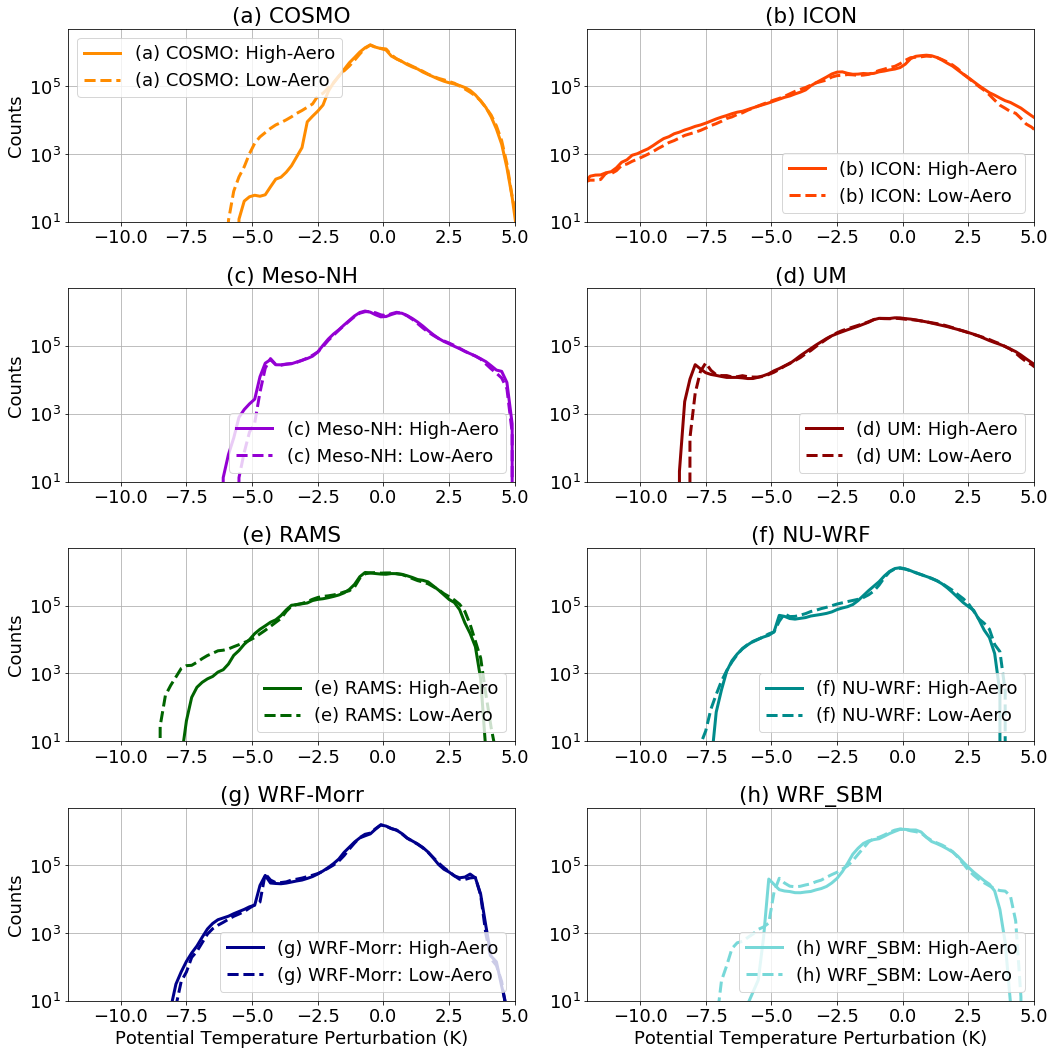

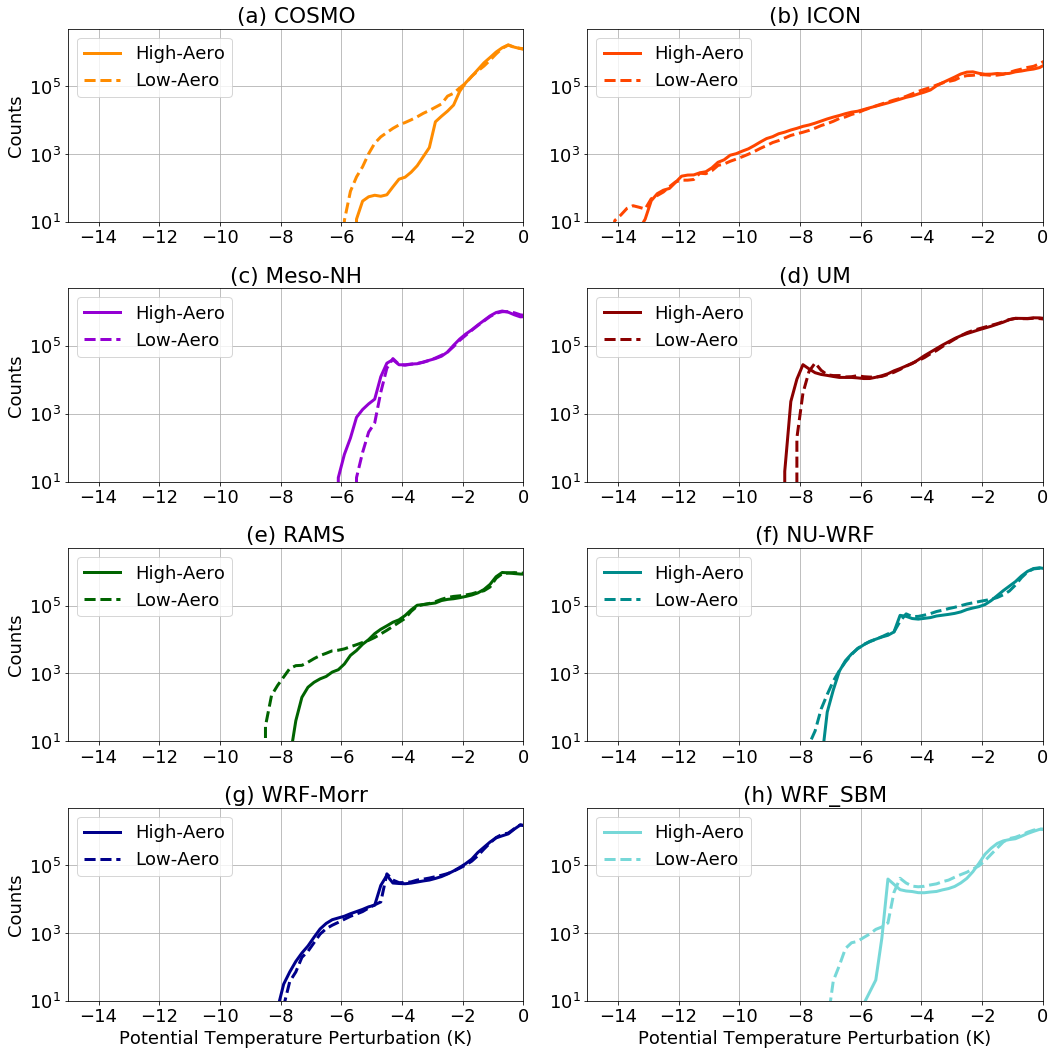

In [16]:
plt.rcParams.update({'font.size': 18})

fig,ax = plt.subplots(4,2,figsize = (15,15))
cntm = 0; cntc = 0
for i in np.arange(0,len(models)):
    ax[cntc,cntm].plot(bin_mids,np.sum(hist[models[i],'POL',vname],axis=0),'-',color=color[models[i]],lw=3,label=modelnames[i]+": High-Aero")
    ax[cntc,cntm].plot(bin_mids,np.sum(hist[models[i],'CLN',vname],axis=0),'--',color=color[models[i]],lw=3,label=modelnames[i]+": Low-Aero")
    ax[cntc,cntm].set_xlim([-12,5])
    ax[cntc,cntm].set_yscale('log')
    ax[cntc,cntm].set_title(modelnames[i])
    ax[cntc,cntm].set_ylim([10,50E5])
    ax[cntc,cntm].legend()
    ax[cntc,cntm].grid()
    if cntm == 0:
        ax[cntc,cntm].set_ylabel('Counts')        
    if cntc == 3:
        ax[cntc,cntm].set_xlabel('Potential Temperature Perturbation (K)')
    cntm = cntm + 1
    if cntm == 2:
        cntc = cntc + 1; cntm = 0
plt.tight_layout()
#plt.savefig(plotdir+vname+"_Perturbation_MeanSurfaceLand_PandC_TimeAccumulated_"+addsavename+".png")    
#plt.close()


fig,ax = plt.subplots(4,2,figsize = (15,15))
cntm = 0; cntc = 0
for i in np.arange(0,len(models)):
    ax[cntc,cntm].plot(bin_mids,np.sum(hist[models[i],'POL',vname],axis=0),'-',color=color[models[i]],lw=3,label="High-Aero")
    ax[cntc,cntm].plot(bin_mids,np.sum(hist[models[i],'CLN',vname],axis=0),'--',color=color[models[i]],lw=3,label="Low-Aero")
    ax[cntc,cntm].set_xlim([-15,0])
    ax[cntc,cntm].set_yscale('log')
    ax[cntc,cntm].set_title(modelnames[i])
    ax[cntc,cntm].set_ylim([10,50E5])
    ax[cntc,cntm].legend()
    ax[cntc,cntm].grid()
    if cntm == 0:
        ax[cntc,cntm].set_ylabel('Counts')        
    if cntc == 3:
        ax[cntc,cntm].set_xlabel('Potential Temperature Perturbation (K)')
    cntm = cntm + 1
    if cntm == 2:
        cntc = cntc + 1; cntm = 0
plt.tight_layout()

savename = 'PubBC_ACPC_Theta_Pert_'+addsavename
fig.tight_layout()
fig.savefig(os.path.join(plotdir,savename+'.pdf'),dpi=300)  
fig.savefig(os.path.join(plotdir,savename+'.png'),dpi=300)  
fig.savefig(os.path.join(plotdir,savename+'.eps'),dpi=300)  

plt.savefig(plotdir+savename+".png")    
plt.savefig(plotdir+savename+".pdf")    
#plt.close()



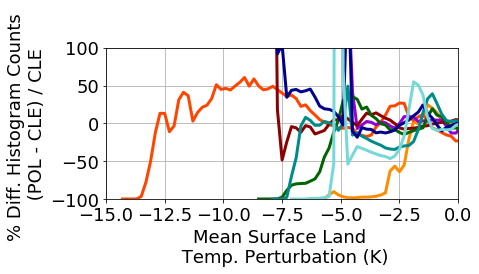

In [20]:
fig,ax = plt.subplots(1,1,figsize = (7,4))
cntm = 0; cntc = 0
for i in np.arange(0,len(models)):
    ax.plot(bin_mids,(np.sum(hist[models[i],'POL',vname],axis=0) \
            - np.sum(hist[models[i],'CLN',vname],axis=0) ) / \
            np.sum(hist[models[i],'CLN',vname],axis=0) * 100 ,'-',color=color[models[i]],lw=3,label=models[i])
ax.set_xlim([-15,0])
ax.set_ylim([-100,100])
ax.grid()
ax.set_ylabel('% Diff. Histogram Counts \n (POL - CLE) / CLE ')        
ax.set_xlabel('Mean Surface Land \n Temp. Perturbation (K)')
plt.tight_layout()
plotdir = '/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2023/'
savename = 'PubBC_ACPC_Theta_Pert_PCTDIF_'+addsavename
fig.tight_layout()
fig.savefig(os.path.join(plotdir,savename+'.pdf'),dpi=300)  
fig.savefig(os.path.join(plotdir,savename+'.png'),dpi=300)  
fig.savefig(os.path.join(plotdir,savename+'.eps'),dpi=300)  

#fig,ax = plt.subplots(1,1,figsize = (7,4))
#cntm = 0; cntc = 0
#for i in np.arange(0,len(models)):
#    ax.plot(bin_mids,(np.sum(hist[models[i],'POL',vname],axis=0) \
#            - np.sum(hist[models[i],'CLN',vname],axis=0) ) / \
#            np.sum(hist[models[i],'CLN',vname],axis=0) * 100 ,'-',color=color[models[i]],lw=3,label=models[i])
#ax.set_xlim([-15,0])
#ax.set_ylim([-100,100])
#ax.grid()
#ax.set_ylabel('% Diff. Histogram Counts \n (POL - CLE) / CLE ')        
#ax.set_xlabel('Mean Surface Land \n Temp. Perturbation (K)')
#plt.tight_layout()
#plt.savefig(plotdir+vname+"_Perturbation_MeanSurfaceLand_PmC_pctdif_TimeAccumulated_LT0"+addsavename+".png")    
#plt.close()



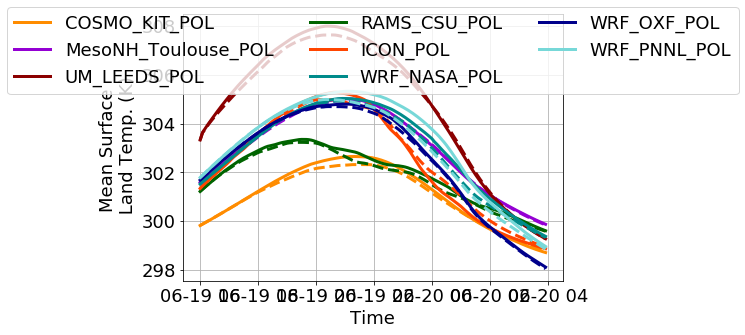

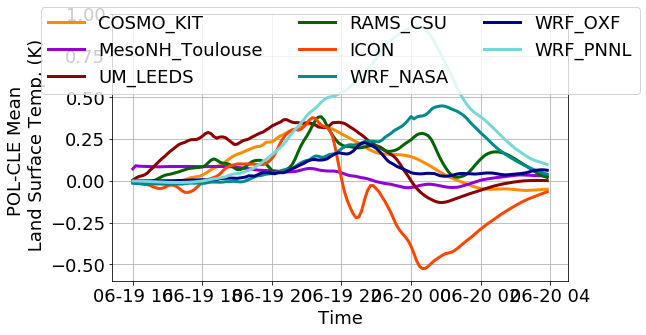

In [21]:
fig,ax = plt.subplots(1,1,figsize = (9,5))
for i in np.arange(0,len(models)):
    ax.plot(t_arr,tavg[models[i],'POL',vname],'-',color=color[models[i]],lw=3,label=models[i]+"_POL")
    ax.plot(t_arr,tavg[models[i],'CLN',vname],'--',color=color[models[i]],lw=3)
ax.set_xlabel('Time'); ax.set_ylabel('Mean Surface \n Land Temp. (K)')
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 1.06),ncol=3); 
plt.grid()
plt.tight_layout()
#plt.savefig(plotdir+vname+"_PandC_MeanSurfaceLand_vTime"+addsavename+".png")    
#plt.close()

fig = plt.figure(figsize = (9,5))
for i in np.arange(0,len(models)):
    plt.plot(t_arr,tavg[models[i],'POL',vname] - tavg[models[i],'CLN',vname],'-',color=color[models[i]],lw=3,label=models[i])
plt.xlabel('Time'); plt.ylabel('POL-CLE Mean \n Land Surface Temp. (K)')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.06),ncol=3); plt.grid()
plt.tight_layout()
#plt.savefig(plotdir+vname+"_PmC_MeanSurfaceLand_vTime"+addsavename+".png")    
#plt.close()

In [ ]:
sdfaf

#fig,ax = plt.subplots(1,1,figsize = (7,4))
#cntm = 0; cntc = 0
#for i in np.arange(0,len(models)):
#    ax.plot(bin_mids,np.sum(hist[models[i],'POL',vname],axis=0) \
#            - np.sum(hist[models[i],'CLN',vname],axis=0),'-',color=color[models[i]],lw=3,label=models[i])
#ax.set_xlim([-12,5])
#ax.set_ylabel('Histogram Counts \n (POL - CLE)')        
#ax.set_xlabel('Mean Surface Land \n Temp. Perturbation (K)')
#ax.grid()
#plt.tight_layout()
#plt.savefig(plotdir+vname+"_Perturbation_MeanSurfaceLand_PmC_TimeAccumulated.png")    
##plt.close()
#
#fig,ax = plt.subplots(1,1,figsize = (7,4))
#cntm = 0; cntc = 0
#for i in np.arange(0,len(models)):
#    ax.plot(bin_mids,np.sum(hist[models[i],'POL',vname],axis=0) \
#            - np.sum(hist[models[i],'CLN',vname],axis=0),'-',color=color[models[i]],lw=3,label=models[i])
#ax.set_xlim([-12,0])
#ax.set_ylabel('Histogram Counts \n (POL - CLE)')        
#ax.set_xlabel('Mean Surface Land \n Temp. Perturbation (K)')
#ax.grid()
#plt.tight_layout()
#plt.savefig(plotdir+vname+"_Perturbation_MeanSurfaceLand_PmC_TimeAccumulated_LT0.png")    
##plt.close()



fig,axs = plt.subplots(7,2,figsize = (10,10))
for i in np.arange(0,len(models)):
    for j in np.arange(0,len(cases)):
    
        a = axs[i,j].contourf(t_arr,bin_mids,np.log10(np.transpose(hist[models[i],cases[j],vname])))
        axs[i,j].set_title(models[i]+' '+cases[j])
        axs[i,j].set_ylim([-10,10])
        
        plt.colorbar(a,ax=axs[i,j])
plt.tight_layout()
#plt.savefig(plotdir+vname+"_PandC_HistPert_vTime.png")    
#plt.close()

clevs = np.arange(-2,2.01,0.1)
fig,axs = plt.subplots(2,4,figsize = (15,8))
cnt1 = 0; cnt2 = 0
for i in np.arange(0,len(models)):
    
    a = axs[cnt1,cnt2].contourf(t_arr,bin_mids,np.log10(np.transpose(hist[models[i],'POL',vname])) - \
               np.log10(np.transpose(hist[models[i],'CLN',vname])), \
               levels=clevs,cmap = plt.cm.bwr)
    axs[cnt1,cnt2].set_title(models[i])
    axs[cnt1,cnt2].set_ylim([-10,10])
    plt.colorbar(a,ax=axs[cnt1,cnt2])
    if cnt2 == 0:
        axs[cnt1,cnt2].set_ylabel('Temp. Pert. (K)')
    if cnt1 == 1:
        axs[cnt1,cnt2].set_xlabel('Time')
    cnt2 = cnt2 + 1
    if cnt2 == 4:
        cnt1 = 1; cnt2 = 0
plt.tight_layout()
#plt.savefig(plotdir+vname+"_PmC_HistPert_vTime.png")    
#plt.close()

